# Netflix Shows - Exploratory Data Analysis
A visual analysis and insight extraction project using the Netflix Shows dataset from Kaggle.

# Project Objective
- To explore and visualize Netflix's global content catalog.
- Identify patterns in content type, genre, and release year.
- Predict the number of releases for 2025.

# Tools & Technologies Used
- Python 
- Pandas  
- NumPy  
- Matplotlib / Seaborn
- scikit-learn  
- Jupyter Notebook

# Dataset Description
The dataset contains information about Netflix Movies and TV Shows available on the platform. The important features include:

- **show_id:** Unique identifier for each title.
- **type**: Type of content — Movie or TV Show.
- **title**: Name of the title.
- **director**: Director of the content (if available).
- **cast**: List of actors involved.
- **country**: Country of production.
- **date_added**: Date when the title was added to Netflix.
- **release_year**: Year when the title was released.
- **rating**: Rating assigned to the content (e.g., TV-MA, PG-13).
- **duration**: Duration of the movie or the number of seasons for TV shows.
- **listed_in**: Genre(s) of the content.
- **description**: Brief description or summary of the title.

This dataset allows performing trend analysis, visualizing the distribution of various attributes, and predicting future content additions on Netflix.


In [15]:
# Step 1: Load the Dataset
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Step 2: Understand the Dataset

# Dataset Info

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


# Summary Statistics

In [87]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
count,8807,8807,8807,6173,7982,8807,8797,8807.000000,8803,8804,8807,8807,8797.000000,8797.000000
unique,8807,2,8807,4528,7692,749,NaN,NaN,17,220,514,8775,NaN,NaN
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN,NaN
freq,1,6131,1,19,19,2818,NaN,NaN,3207,1793,362,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-17 05:59:08.436967168,2014.180198,NaN,NaN,NaN,NaN,2018.871888,6.654996
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,2008.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN,NaN,2018.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-02 00:00:00,2017.000000,NaN,NaN,NaN,NaN,2019.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-19 00:00:00,2019.000000,NaN,NaN,NaN,NaN,2020.000000,10.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.000000,12.000000


# Step 3: Data Cleaning

#  Check for Missing Values

In [93]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

# Handle Missing Data

In [96]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df.dropna(subset=['country', 'date_added'], inplace=True)
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


# Step 4: Exploratory Data Analysis

# Content Type Distribution (Movies vs TV Shows)

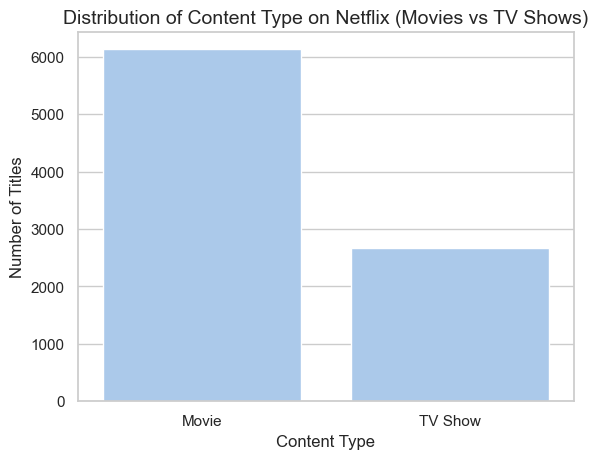

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="pastel") 
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type on Netflix (Movies vs TV Shows)", fontsize=14)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.show()


# Top Genres on Netflix

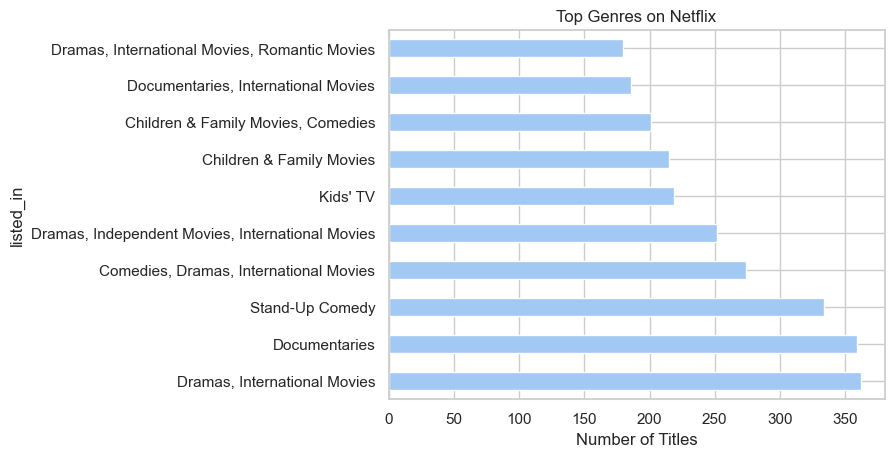

In [105]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title("Top Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()


# Netflix Releases Over the Years

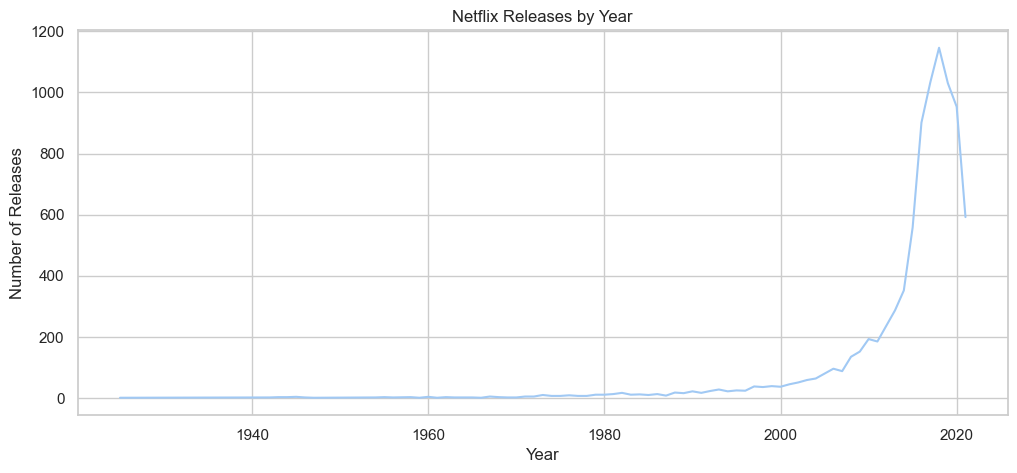

In [110]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,5))
plt.title("Netflix Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()


# Top 10 Countries with Most Netflix Shows

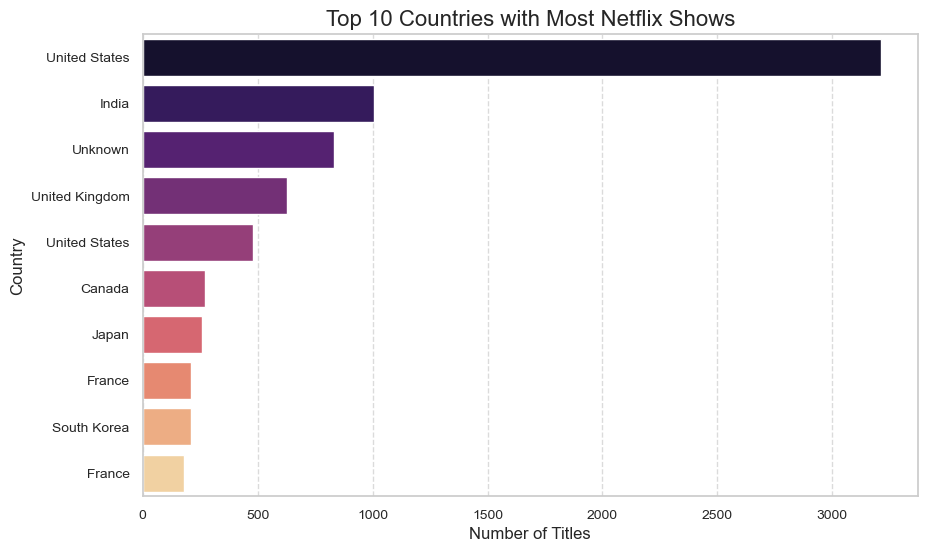

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values in 'country'
df['country'].fillna('Unknown', inplace=True)

# Split multiple countries, count each separately
country_counts = df['country'].str.split(',').explode().value_counts().head(10)

# Convert to DataFrame for seaborn
country_df = country_counts.reset_index()
country_df.columns = ['Country', 'Count']

# Assign hue as 'Country' to use palette correctly
plt.figure(figsize=(10,6))
sns.barplot(data=country_df, y='Country', x='Count', hue='Country', dodge=False, palette='magma', legend=False)

plt.title("Top 10 Countries with Most Netflix Shows", fontsize=16)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Monthly Trend of Content Added to Netflix

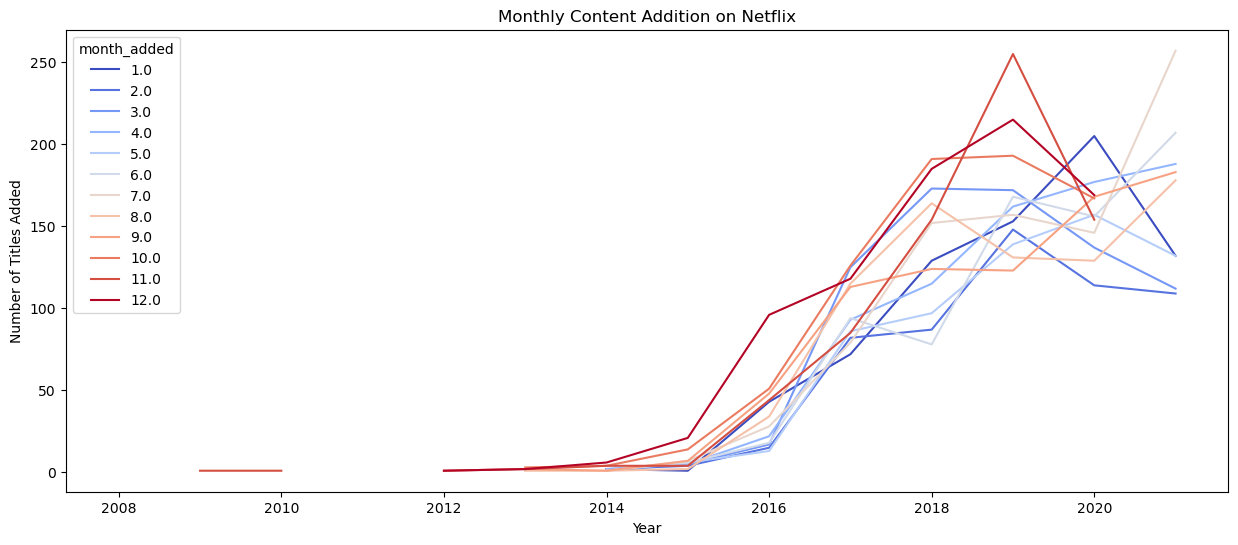

In [43]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

monthly_data = df.groupby(['year_added', 'month_added']).size().unstack()
monthly_data.plot(figsize=(15,6), cmap='coolwarm')
plt.title("Monthly Content Addition on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()


# Extracting Year and Month from Date Added

In [120]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()
df['date_added'] = df['date_added'].str.strip()  
df['date_added'] = pd.to_datetime(df['date_added']) 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



# Ratings Distribution

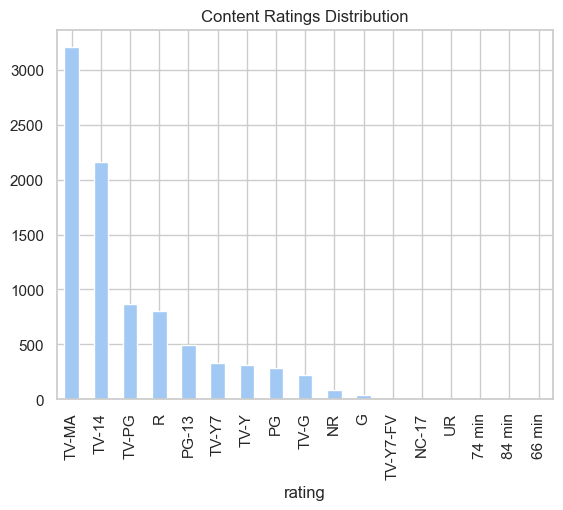

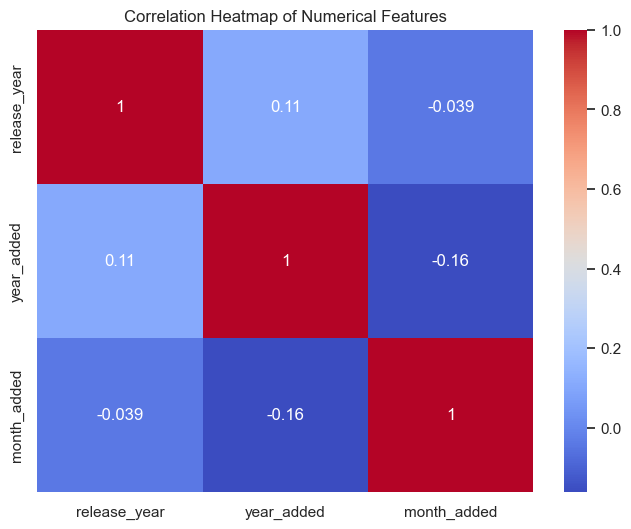

In [123]:
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Ratings Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Predicting Netflix Releases for 2025 using Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
import numpy as np

release_counts = df['release_year'].value_counts().sort_index()
years = release_counts.index.values.reshape(-1,1)
counts = release_counts.values

model = LinearRegression()
model.fit(years, counts)
next_year = np.array([[2025]])
predicted_count = model.predict(next_year)
print(f"Predicted number of releases for 2025: {int(predicted_count[0])}")


Predicted number of releases for 2025: 404


# Conclusion & Insights

 * Netflix's content is dominated by Movies, but TV Shows are a growing category.  
 * Major content contributors are the US, India, and the UK — ideal markets for expansion.  
 * Popular genres are Documentaries, Dramas, and Stand-Up Comedy — reflecting global preferences.  
 * Content releases spiked post-2015, indicating streaming demand growth.  
 * The seasonal pattern of monthly additions shows that certain months are more favored for new content releases.





# Future Scope:

- Integrating IMDb ratings for deeper content quality analysis.
- Sentiment analysis of Netflix reviews (if review data is available).
- Predicting genre popularity trends using time-series analysis.
- Clustering shows based on genres, directors, and countries for recommendation systems.
